```
Copyright (C) 2024-2025 Yucheng Liu. Under the GNU AGPL 3.0 License.
GNU AGPL 3.0 License: https://www.gnu.org/licenses/agpl-3.0.txt .

Copyright (C) 2024-2025 Yucheng Liu. Under the CC-BY-SA 4.0 License.
CC-BY-SA 4.0 License: https://creativecommons.org/licenses/by-sa/4.0/legalcode.txt .
```

# 5.1. Analyzing All Users' Questionnaire Responses Data

Analyzing all users' questionnaire responses data.

Read questionnaire responses data from `./_5_Data_QuestionnaireResponses/AllUsers_Responses.csv`.

Analyze the data by going through the following steps.

- Read the data.
- Compute graphical age statistics.
- Compute graphical gender statistics.
- Compute graphical gender vs. age statistics.
- Compute graphical multifacet statistics.
- Complete analyzing the data.

Begin analyzing data for all users
Begin Data_
       UserIndex  PresetSequence  SexOrGender        Age  \
count   4.000000         4.00000         4.00   4.000000   
mean    1.500000         1.50000         1.75  37.000000   
std     1.290994         0.57735         0.50  13.316656   
min     0.000000         1.00000         1.00  26.000000   
25%     0.750000         1.00000         1.75  29.000000   
50%     1.500000         1.50000         2.00  33.000000   
75%     2.250000         2.00000         2.00  41.000000   
max     3.000000         2.00000         2.00  56.000000   

       RaceOrEthnicity_Specified  CountryOrRegion_Specified   PCUsage  \
count                        0.0                        0.0  4.000000   
mean                         NaN                        NaN  7.000000   
std                          NaN                        NaN  1.414214   
min                          NaN                        NaN  5.000000   
25%                          NaN               

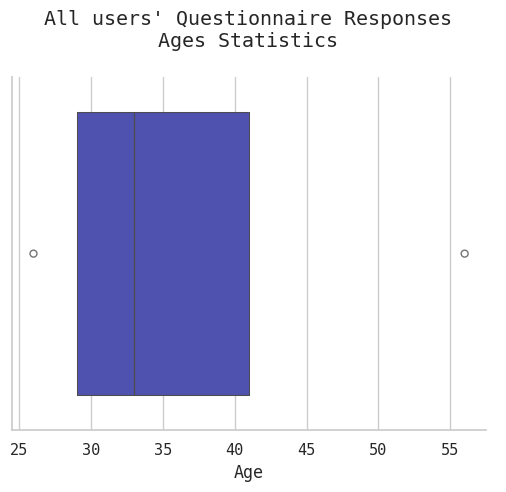

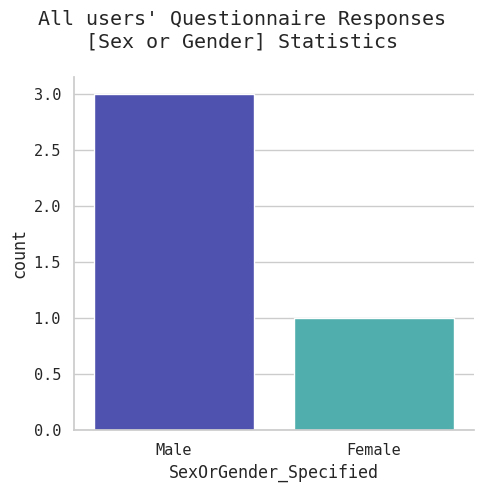

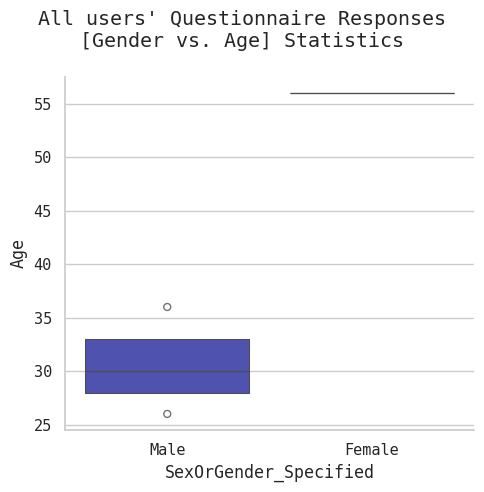

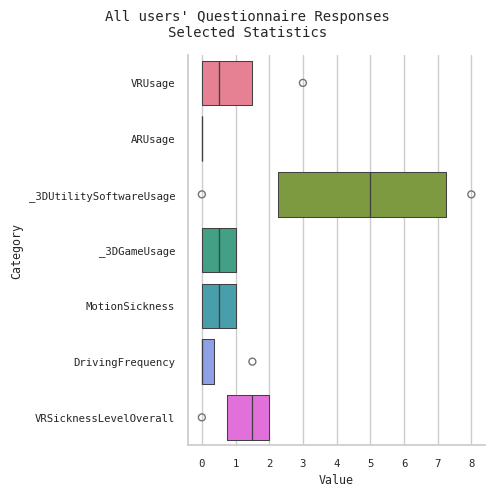

End analyzing data for all users







In [1]:
import json
import os
import sys

import matplotlib.pyplot as pyplot
import pandas
import seaborn

# %matplotlib inline

Path_Self = os.path.abspath(os.path.curdir)
Path_Input = os.path.join(Path_Self, "_5_Data_QuestionnaireResponses")
Path_Output = os.path.join(Path_Self, "Figures_Computed")
Path_Output_Texts = os.path.join(Path_Self, "Texts_Computed")
os.makedirs(Path_Output_Texts, exist_ok=True)
Path_Output_Text = os.path.join(Path_Output_Texts, "_5_1_Text_QuestionnaireResponses.txt")
File_Output_Text = open(Path_Output_Text, "w+")

def print_(*args, **kwargs):
    Files = [
        sys.stdout,
        File_Output_Text,
    ]

    for File_ in Files:
        kwargs["file"] = File_
        print(*args, **kwargs)
        File_.flush()
    # end for
# end def

print_(f"Begin analyzing data for all users")

# ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== 
# - Read the data.

Path_Input_Users = os.path.join(Path_Input, "AllUsers_Responses.csv")
Path_Output_Users = os.path.join(Path_Output, f"AllUsers_Responses")
os.makedirs(Path_Output_Users, exist_ok=True)

def Path_Output_Figure_Find(Path_):
    return os.path.join(Path_Output_Users, Path_)
# end def

Data_ = pandas.read_csv(Path_Input_Users)

print_(
    "Begin Data_\n"
    + str(Data_.describe())
    + "\nEnd Data_"
)

# ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== 
# - Compute graphical age statistics.

ColorMap = seaborn.hls_palette(
    n_colors=6,
    h=0.83,
    l=0.50,
    s=0.50,
)

Palette_ = seaborn.color_palette(ColorMap)
Palette_.reverse()

seaborn.set_theme(
    context="notebook",
    style="whitegrid",
    palette=Palette_,
    font="monospace",
)

Plot = seaborn.catplot(
    data=Data_,
    x="Age",
    kind="boxen",
    native_scale=True,
)

Plot.figure.suptitle(
    "All users' Questionnaire Responses\n"
    + "Ages Statistics"
)

pyplot.tight_layout(rect=[0, 0, 1, 1])
pyplot.show()

Plot.figure.savefig(
    Path_Output_Figure_Find(f"fig_AllUsers_Responses_Ages_Stats.png"),
    dpi=Plot.figure.dpi,
)

# ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== 
# - Compute graphical gender statistics.

Plot = seaborn.catplot(
    data=Data_,
    x="SexOrGender_Specified",
    hue="SexOrGender_Specified",
    kind="count",
    native_scale=True,
)

Plot.figure.suptitle(
    "All users' Questionnaire Responses\n"
    + "[Sex or Gender] Statistics"
)

pyplot.tight_layout(rect=[0, 0, 1, 1])
pyplot.show()

Plot.figure.savefig(
    Path_Output_Figure_Find(f"fig_AllUsers_Responses_Genders_Stats.png"),
    dpi=Plot.figure.dpi,
)

# ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== 
# - Compute graphical gender vs. age statistics.

Plot = seaborn.catplot(
    data=Data_,
    x="SexOrGender_Specified",
    y="Age",
    hue="SexOrGender_Specified",
    kind="boxen",
    native_scale=True,
)

Plot.figure.suptitle(
    "All users' Questionnaire Responses\n"
    + "[Gender vs. Age] Statistics"
)

pyplot.tight_layout(rect=[0, 0, 1, 1])
pyplot.show()

Plot.figure.savefig(
    Path_Output_Figure_Find(f"fig_AllUsers_Responses_Gender_VsAge_Stats.png"),
    dpi=Plot.figure.dpi,
)

# ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== 
# - Compute graphical multifacet statistics.

Data_Selected = Data_[[
    "UserIndex",
    "VRUsage",
    "ARUsage",
    "_3DUtilitySoftwareUsage",
    "_3DGameUsage",
    "MotionSickness",
    "DrivingFrequency",
    "VRSicknessLevelOverall",
]]

Data_Selected_Melted = pandas.melt(
    frame=Data_Selected,
    id_vars=["UserIndex"],
    var_name="Category",
    value_name="Value",
)

with seaborn.plotting_context(
    context="notebook",
    font_scale=0.70
):
    Plot = seaborn.catplot(
        data=Data_Selected_Melted,
        x="Value",
        y="Category",
        hue="Category",
        kind="boxen",
        native_scale=True,
    )

    Plot.figure.suptitle(
        "All users' Questionnaire Responses\n"
        + "Selected Statistics"
    )

    pyplot.tight_layout(rect=[0, 0, 1, 1])
    pyplot.show()

    Plot.figure.savefig(
    Path_Output_Figure_Find(f"fig_AllUsers_Responses_Selected_Stats.png"),
    dpi=Plot.figure.dpi,
)
# end with

# ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== ==== 
# - Complete analyzing the data.

print_(f"End analyzing data for all users")
print_("\n\n\n\n")

File_Output_Text.close()


## Congrats! 

We have completed this `ipynb` notebook.